In [30]:
import pandas as pd 
import numpy as np

from PIL import Image
import requests
from io import BytesIO

from tqdm import tqdm

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import pairwise_distances

In [31]:
df = pd.read_csv('books_1.Best_Books_Ever.csv')
df.sample(7)

bookId                   title  \
46945   271301.A_Fine_And_Bitter_Snow  A Fine And Bitter Snow   
7638              15704485-the-prince              The Prince   
11932         11205802-lost-and-found          Lost and Found   
23548  40396484-the-bride-from-moscow   The Bride from Moscow   
18733             16173593-dissidence              Dissidence   
22776           8251596-gras-i-proast        Grasă şi proastă   
6795        9477999-heavy-duty-people       Heavy Duty People   

                        series  \
46945          Kate Shugak #12   
7638   The Original Sinners #3   
11932      Emi Lost & Found #1   
23548                      NaN   
18733            Dissidence #1   
22776                      NaN   
6795       Brethren Trilogy #1   

                                                author  rating  \
46945                 Dana Stabenow (Goodreads Author)    4.25   
7638                  Tiffany Reisz (Goodreads Author)    4.46   
11932                  Lori L. Otto (Goodreads Author)    3.96   
23548                 Natasha Lukin (Goodreads Author)    5.00   
18733                  Jamie Canosa (Goodreads Author)    3.80   
22776                           Rodica Ojog-Braşoveanu    4.11   
6795   Iain Parke (Goodreads Author), Martin Robertson    3.97   

                                             description  language  \
46945  Change never comes easy so when the news break...   English   
7638   Two worlds of wealth and passion call to Nora ...   English   
11932  Emi Lost & Found series - Winner of the Best H...   English   
23548  Set against a backdrop of the collapse of the ...   English   
18733  In dystopian America, sixteen-year-old Kaleigh...   English   
22776  „Era o femeie mignona, rotunda, depasind deja ...  Romanian   
6795   When loyalty to his bike club and his brothers...   English   

                isbn                                             genres  \
46945  9780312989477  ['Mystery', 'Fiction', 'Crime', 'Mystery Thril...   
7638   9780778314103  ['BDSM', 'Erotica', 'Romance', 'Dark', 'Adult'...   
11932  9781453755402  ['Romance', 'New Adult', 'Contemporary', 'Cont...   
23548     B0198MINWC                                                 []   
18733  9999999999999  ['Dystopia', 'Young Adult', 'Post Apocalyptic'...   
22776  9999999999999  ['Romanian Literature', 'Short Stories', 'Fict...   
6795   9780956161512        ['Thriller', 'Fiction', 'Mystery Thriller']   

                                              characters  ...  \
46945  ['Kate Shugak', 'Jim Chopin', "Dan O'Brien", '...  ...   
7638                                   ['Kingsley Edge']  ...   
11932  ['Nathaniel "Nate" Wilson', 'Emily "Emi" Henni...  ...   
23548                                                 []  ...   
18733                                                 []  ...   
22776                                                 []  ...   
6795                                                  []  ...   

      firstPublishDate awards numRatings  \
46945         11/06/02     []       3725   
7638               NaN     []      12418   
11932         08/08/10     []       3273   
23548              NaN     []          6   
18733         11/25/12     []        314   
22776         10/30/00     []        742   
6795               NaN     []        238   

                               ratingsByStars likedPercent setting  \
46945     ['1638', '1491', '522', '55', '19']         98.0      []   
7638   ['7724', '3252', '1058', '245', '139']         97.0      []   
11932   ['1264', '1073', '596', '206', '134']         90.0      []   
23548               ['6', '0', '0', '0', '0']        100.0      []   
18733         ['104', '95', '77', '25', '13']         88.0      []   
22776        ['302', '263', '139', '29', '9']         95.0      []   
6795          ['100', '67', '45', '16', '10']         89.0      []   

                                                coverImg  bbeScore bbeVotes  \
46945  https://i.gr-assets.com/i

In [32]:
max(df['rating'])

5.0

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            52478 non-null  object 
 1   title             52478 non-null  object 
 2   series            23470 non-null  object 
 3   author            52478 non-null  object 
 4   rating            52478 non-null  float64
 5   description       51140 non-null  object 
 6   language          48672 non-null  object 
 7   isbn              52478 non-null  object 
 8   genres            52478 non-null  object 
 9   characters        52478 non-null  object 
 10  bookFormat        51005 non-null  object 
 11  edition           4955 non-null   object 
 12  pages             50131 non-null  object 
 13  publisher         48782 non-null  object 
 14  publishDate       51598 non-null  object 
 15  firstPublishDate  31152 non-null  object 
 16  awards            52478 non-null  object

# data preprocessing

In [34]:
# we will use genre column for book recommendation
# so we will clean genre column data

In [35]:
aa = df['genres'][0]
aa

"['Young Adult', 'Fiction', 'Dystopia', 'Fantasy', 'Science Fiction', 'Romance', 'Adventure', 'Teen', 'Post Apocalyptic', 'Action']"

In [36]:
type(aa)

str

In [37]:
ab = aa[1: len(aa)-1]
ab 

"'Young Adult', 'Fiction', 'Dystopia', 'Fantasy', 'Science Fiction', 'Romance', 'Adventure', 'Teen', 'Post Apocalyptic', 'Action'"

In [38]:
dd = ab.split(',')
dd

["'Young Adult'",
 " 'Fiction'",
 " 'Dystopia'",
 " 'Fantasy'",
 " 'Science Fiction'",
 " 'Romance'",
 " 'Adventure'",
 " 'Teen'",
 " 'Post Apocalyptic'",
 " 'Action'"]

In [39]:
temp = [i.strip()[1 : len(i) -1] for i in dd]
temp

['Young Adult',
 "Fiction'",
 "Dystopia'",
 "Fantasy'",
 "Science Fiction'",
 "Romance'",
 "Adventure'",
 "Teen'",
 "Post Apocalyptic'",
 "Action'"]

In [40]:
def genre_cleaning(aa):
    
    temp1 = aa.split(',')
    
    temp2 = [i.strip() for i in temp1]
    
    temp3 = [i[1: len(i)-1] for i in temp2]
    
    temp4 = [i.replace(" ", "_").lower() for i in temp3]
    
    temp5 = " ".join(temp4)
    
    return temp5

In [41]:
temp = df['genres']

counter = 0


for i in temp:
    df.at[counter, 'genres'] = genre_cleaning(i)
    counter = counter + 1
    


# featurizin genre using bag of word technique

In [42]:
bow = CountVectorizer()
bow.fit(df['genres'])
bow_vec = bow.transform(df['genres'])

# book recommendation model 

In [43]:
def recommendation(book_lst, book_id):
    
    cosine_dist = pairwise_distances(book_lst, book_lst[book_id])
    
    # np.argsort return index according to sorting means let we have 100 as max number in our array and its index is 14
    # so it will return new array whose first element will be 14
    
    return np.argsort(cosine_dist.flatten()[:20])
    

In [76]:
recommendation(bow_vec, 10000)

array([ 0, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,
        1, 18, 19], dtype=int64)

In [22]:
import random

dd = random.choices([i for i in range(52000)], k = 25)



In [23]:
dd

[22292,
 34602,
 22249,
 7305,
 39205,
 28364,
 30513,
 16630,
 48814,
 43933,
 41681,
 39835,
 533,
 35806,
 3900,
 22108,
 44650,
 37580,
 38852,
 9140,
 41042,
 30978,
 22369,
 43043,
 14619]

In [24]:
for i in tqdm(range(52000)):
    if 126 in recommendation(bow_vec, i):
        print(i)

100%|███████████████████████████████████████████████████████████████████████████| 52000/52000 [06:25<00:00, 134.72it/s]


In [45]:
def image_downloader(url):
    
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    
    return img

In [46]:
def model(book_lst, book_id):
    dd = recommendation(book_lst, book_id)
    
    display("Book selected By you")
    display(f"Book name: {df['title'][book_id]}")
    display(f"Book Author: {df['author'][book_id]}")
    display(f"Book rating: {df['rating'][book_id]}")
    display(f"Book Genre: {df['genres'][book_id]}")
    
    display(image_downloader(df['coverImg'][book_id]))
    
    display("Recommendation book on basis of book selected by you")
    
    for i in dd:
        
        display(f"Book name: {df['title'][i]}")
        display(f"Book Author: {df['author'][i]}")
        display(f"Book rating: {df['rating'][i]}")
        display(f"Book Genre: {df['genres'][i]}")
        display(image_downloader(df['coverImg'][i]))

'Book selected By you'

'Book name: Start Something That Matters'

'Book Author: Blake Mycoskie'

'Book rating: 4.02'

"Book Genre: 'nonfiction business entrepreneurship biography self_help memoir inspirational leadership buisness autobiography'"

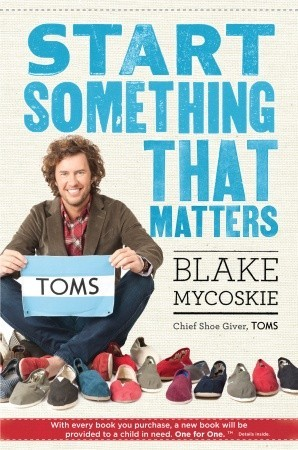

'Recommendation book on basis of book selected by you'

'Book name: The Hunger Games'

'Book Author: Suzanne Collins'

'Book rating: 4.33'

"Book Genre: 'young_adult fiction dystopia fantasy science_fiction romance adventure teen post_apocalyptic action'"

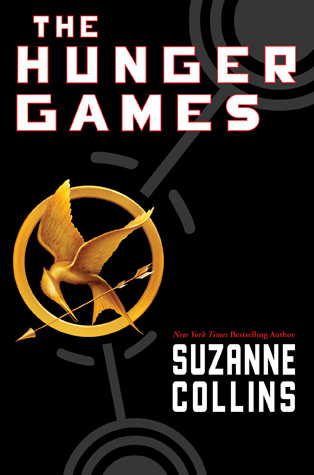

"Book name: Alice's Adventures in Wonderland & Through the Looking-Glass"

'Book Author: Lewis Carroll, John Tenniel (Illustrator), Martin Gardner (Introduction)'

'Book rating: 4.06'

"Book Genre: 'classics fantasy fiction childrens young_adult literature adventure novels 19th_century british_literature'"

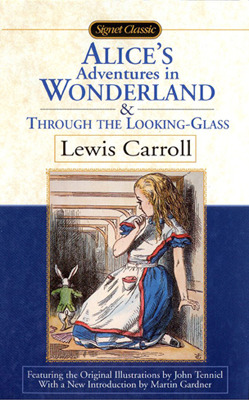

'Book name: The Picture of Dorian Gray'

'Book Author: Oscar Wilde, Jeffrey Eugenides (Introduction)'

'Book rating: 4.08'

"Book Genre: 'classics fiction horror fantasy literature gothic novels 19th_century lgbt classic_literature'"

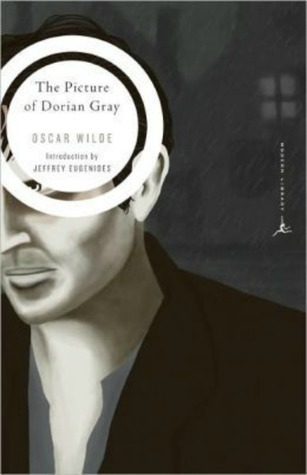

'Book name: Memoirs of a Geisha'

'Book Author: Arthur Golden'

'Book rating: 4.12'

"Book Genre: 'fiction historical_fiction romance historical classics japan adult novels asia adult_fiction'"

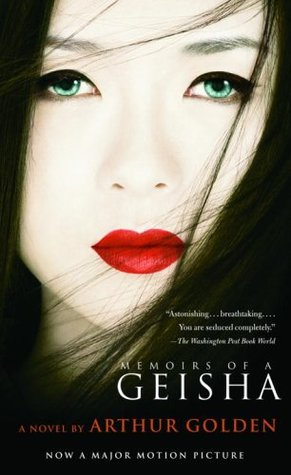

'Book name: The Da Vinci Code'

'Book Author: Dan Brown (Goodreads Author)'

'Book rating: 3.86'

"Book Genre: 'fiction mystery thriller suspense mystery_thriller historical_fiction adventure novels crime adult'"

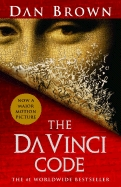

'Book name: Wuthering Heights'

'Book Author: Emily Brontë, Richard J. Dunn (Editor), David Timson (Narrator), Charlotte Brontë (Commentary), Robert Heindel (Illustrator)'

'Book rating: 3.86'

"Book Genre: 'classics fiction romance gothic literature historical_fiction 19th_century novels classic_literature historical'"

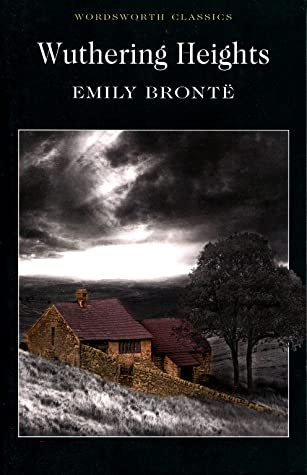

'Book name: The Giving Tree'

'Book Author: Shel Silverstein'

'Book rating: 4.37'

"Book Genre: 'childrens picture_books classics fiction poetry young_adult fantasy juvenile kids short_stories'"

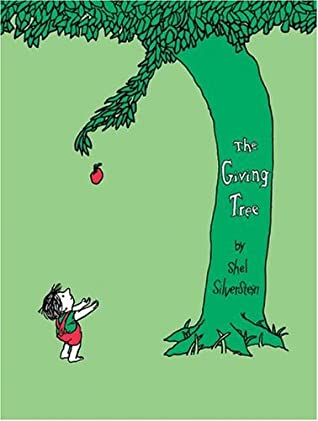

"Book name: The Hitchhiker's Guide to the Galaxy"

'Book Author: Douglas Adams'

'Book rating: 4.22'

"Book Genre: 'science_fiction fiction humor fantasy classics comedy science_fiction_fantasy audiobook adventure novels'"

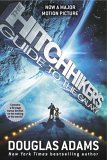

'Book name: The Fault in Our Stars'

'Book Author: John Green (Goodreads Author)'

'Book rating: 4.21'

"Book Genre: 'young_adult romance fiction contemporary realistic_fiction teen coming_of_age drama novels love'"

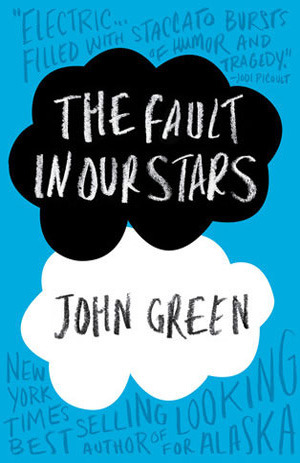

'Book name: Gone with the Wind'

'Book Author: Margaret Mitchell'

'Book rating: 4.3'

"Book Genre: 'classics historical_fiction fiction romance historical war literature civil_war historical_romance novels'"

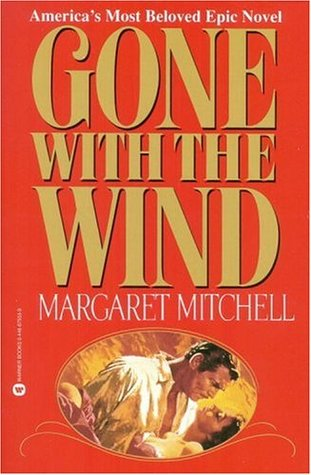

'Book name: J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings'

'Book Author: J.R.R. Tolkien'

'Book rating: 4.6'

"Book Genre: 'fantasy fiction classics adventure science_fiction_fantasy epic_fantasy high_fantasy young_adult literature magic'"

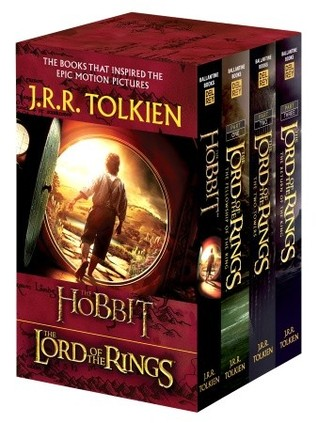

'Book name: The Chronicles of Narnia'

'Book Author: C.S. Lewis, Pauline Baynes (Illustrator)'

'Book rating: 4.26'

"Book Genre: 'fantasy classics fiction young_adult childrens christian adventure science_fiction_fantasy middle_grade christian_fiction'"

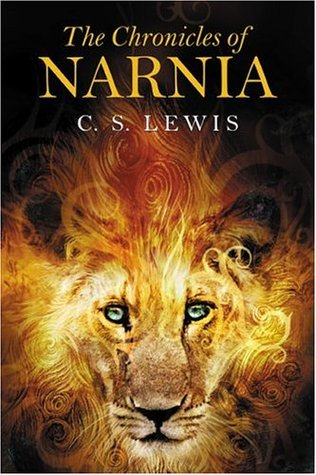

'Book name: Animal Farm'

'Book Author: George Orwell, Russell Baker (Preface), C.M. Woodhouse (Introduction)'

'Book rating: 3.95'

"Book Genre: 'classics fiction dystopia fantasy literature politics school science_fiction novels read_for_school'"

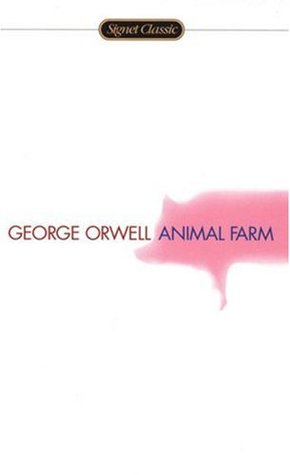

'Book name: The Book Thief'

'Book Author: Markus Zusak (Goodreads Author)'

'Book rating: 4.37'

"Book Genre: 'historical_fiction fiction young_adult historical classics war holocaust world_war_ii books_about_books audiobook'"

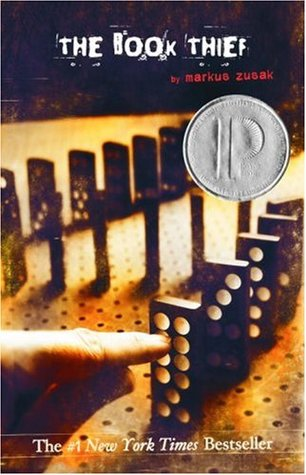

'Book name: Twilight'

'Book Author: Stephenie Meyer'

'Book rating: 3.6'

"Book Genre: 'young_adult fantasy romance vampires fiction paranormal paranormal_romance supernatural teen urban_fantasy'"

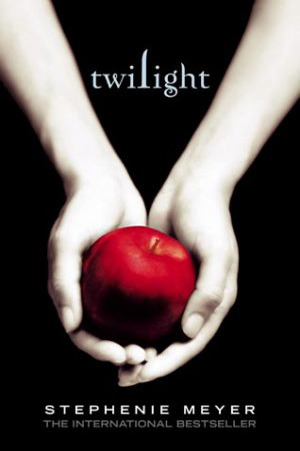

'Book name: Pride and Prejudice'

'Book Author: Jane Austen, Anna Quindlen (Introduction)'

'Book rating: 4.26'

"Book Genre: 'classics fiction romance historical_fiction literature historical novels historical_romance classic_literature adult'"

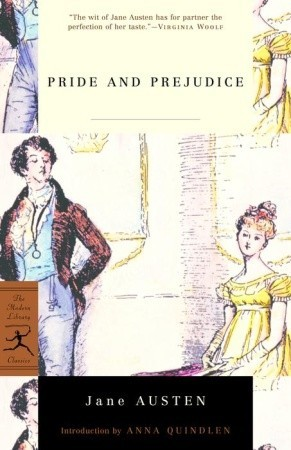

'Book name: To Kill a Mockingbird'

'Book Author: Harper Lee'

'Book rating: 4.28'

"Book Genre: 'classics fiction historical_fiction school literature young_adult historical novels read_for_school high_school'"

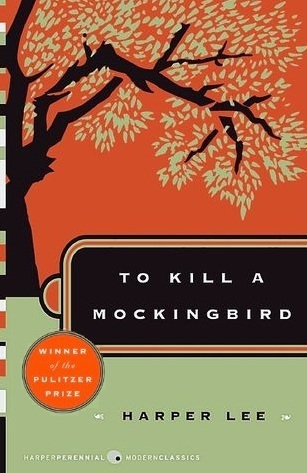

'Book name: Harry Potter and the Order of the Phoenix'

'Book Author: J.K. Rowling, Mary GrandPré (Illustrator)'

'Book rating: 4.5'

"Book Genre: 'fantasy young_adult fiction magic childrens adventure audiobook middle_grade classics science_fiction_fantasy'"

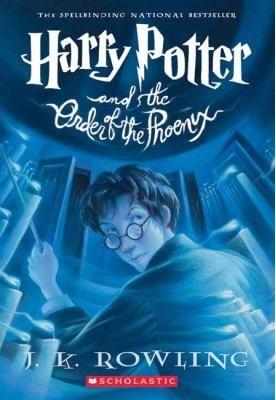

'Book name: Jane Eyre'

'Book Author: Charlotte Brontë, Michael Mason (Editor), Barnett Freedman (Illustrator)'

'Book rating: 4.13'

"Book Genre: 'classics fiction romance historical_fiction literature gothic historical 19th_century school classic_literature'"

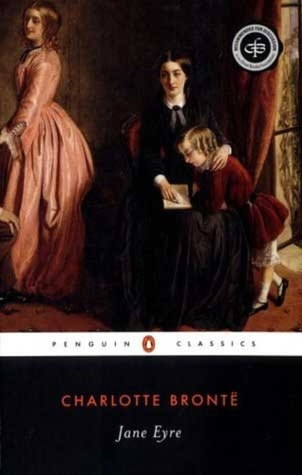

'Book name: Les Misérables'

'Book Author: Victor Hugo, Lee Fahnestock (Translator), Norman MacAfee (Translator)'

'Book rating: 4.18'

"Book Genre: 'classics fiction historical_fiction literature france historical novels french_literature romance classic_literature'"

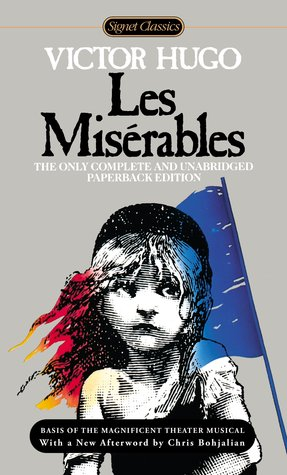

In [75]:
model(book_lst=bow_vec, book_id=10000)

# rough work

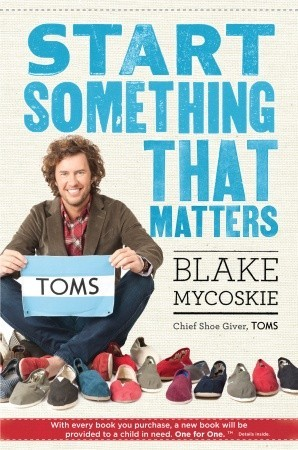

In [44]:

response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

In [74]:
counter = 0

for i in df['title']:
#     print(i)
    temp = i.split(" ")
#     print(temp)


    for j in temp:
        
        if j.lower()=='matters':
            print(i, counter)
            
            
    counter = counter + 1

Song Bird: Matters of the Heart 2272
Being Mortal: Medicine and What Matters in the End 4640
Family Matters 5088
Start Something That Matters 10000
When Love Matters Most 11673
All That Matters 13836
Start: Punch Fear in the Face, Escape Average and Do Work that Matters 14785
All That Matters 16065
JFK and the Unspeakable: Why He Died and Why It Matters 18224
Counterfeit Gods: The Empty Promises of Money, Sex, and Power, and the Only Hope That Matters 18742
All That Matters 20524
A Liberated Mind: How to Pivot Toward What Matters 23398
What Matters Most is How Well You Walk Through the Fire 25366
unChristian: What a New Generation Really Thinks about Christianity... and Why It Matters 25658
Mike Nelson's Mind over Matters 25748
Living in Light of Eternity: How to base your life on what really matters (The Christian Character Library) 26263
Why Race Matters 27134
The Power of Meaning: Crafting a Life That Matters 27172
Hidden Treasures: Heaven's Astonishing Help with Your Money Matters 

In [15]:
df.head(5)

bookId  \
0                     2767052-the-hunger-games   
1  2.Harry_Potter_and_the_Order_of_the_Phoenix   
2                   2657.To_Kill_a_Mockingbird   
3                     1885.Pride_and_Prejudice   
4                               41865.Twilight   

                                       title                 series  \
0                           The Hunger Games    The Hunger Games #1   
1  Harry Potter and the Order of the Phoenix        Harry Potter #5   
2                      To Kill a Mockingbird  To Kill a Mockingbird   
3                        Pride and Prejudice                    NaN   
4                                   Twilight   The Twilight Saga #1   

                                      author  rating  \
0                            Suzanne Collins    4.33   
1  J.K. Rowling, Mary GrandPré (Illustrator)    4.50   
2                                 Harper Lee    4.28   
3  Jane Austen, Anna Quindlen (Introduction)    4.26   
4                            Stephenie Meyer    3.60   

                                         description language           isbn  \
0  WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...  English  9780439023481   
1  There is a door at the end of a silent corrido...  English  9780439358071   
2  The unforgettable novel of a childhood in a sl...  English  9999999999999   
3  Alternate cover edition of ISBN 9780679783268S...  English  9999999999999   
4  About three things I was absolutely positive.\...  English  9780316015844   

                                              genres  \
0  'young_adult fiction dystopia fantasy science_...   
1  'fantasy young_adult fiction magic childrens a...   
2  'classics fiction historical_fiction school li...   
3  'classics fiction romance historical_fiction l...   
4  'young_adult fantasy romance vampires fiction ...   

                                          characters  ... firstPublishDate  \
0  ['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...  ...              NaN   
1  ['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...  ...         06/21/03   
2  ['Scout Finch', 'Atticus Finch', 'Jem Finch', ...  ...         07/11/60   
3  ['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...  ...         01/28/13   
4  ['Edward Cullen', 'Jacob Black', 'Laurent', 'R...  ...         10/05/05   

                                              awards numRatings  \
0  ['Locus Award Nominee for Best Young Adult Boo...    6376780   
1  ['Bram Stoker Award for Works for Young Reader...    2507623   
2  ['Pulitzer Prize for Fiction (1961)', 'Audie A...    4501075   
3                                                 []    2998241   
4  ['Georgia Peach Book Award (2007)', 'Buxtehude...    4964519   

                                      ratingsByStars likedPercent  \
0  ['3444695', '1921313', '745221', '171994', '93...         96.0   
1  ['1593642', '637516', '222366', '39573', '14526']         98.0   
2  ['2363896', '1333153', '573280', '149952', '80...         95.0   
3  ['1617567', '816659', '373311', '113934', '767...         94.0   
4  ['1751460', '1113682', '1008686', '542017', '5...         78.0   

                                             setting  \
0  ['District 12, Panem', 'Capitol, Panem', 'Pane...   
1  ['Hogwarts School of Witchcraft and Wizardry (...   
2               ['Maycomb, Alabama (United States)']   
3  ['United Kingdom', 'Derbyshire, England (Unite...   
4  ['Forks, Washington (United States)', 'Phoenix...   

                                            coverImg  bbeScore bbeVotes  price  
0  https://i.gr-assets.com/images/S/compressed.ph...   2993816    30516   5.09  
1  https://i.gr-assets.com/images/S/compressed.ph...   2632233    26923   7.38  
2  https://i.gr-assets.com/images/S/compressed.ph...   2269402    23328    NaN  
3  https://i.gr-assets.com/images/S/compressed.ph...   1983116    20452    NaN  
4  https://i.gr-assets.com/images/S/compressed.ph...   1459448    14874    2.1  

[5 rows x 25 columns]

In [16]:
df['genres']

0        'young_adult fiction dystopia fantasy science_...
1        'fantasy young_adult fiction magic childrens a...
2        'classics fiction historical_fiction school li...
3        'classics fiction romance historical_fiction l...
4        'young_adult fantasy romance vampires fiction ...
                               ...                        
52473    'vampires paranormal young_adult romance fanta...
52474                                'mystery young_adult'
52475    'fantasy young_adult paranormal angels romance...
52476    'fiction mystery historical_fiction adventure ...
52477    'lds_fiction historical_fiction young_adult fi...
Name: genres, Length: 52478, dtype: object

CountVectorizer()

In [19]:
bow.get_feature_names()

c:\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['10th_century',
 '11th_century',
 '12th_century',
 '13th_century',
 '14th_century',
 '15th_century',
 '16th_century',
 '17th_century',
 '18th_century',
 '19th_century',
 '1st_grade',
 '20th_century',
 '21st_century',
 '2nd_grade',
 '40k',
 'abuse',
 'academia',
 'academic',
 'academics',
 'action',
 'activism',
 'adolescence',
 'adoption',
 'adult',
 'adult_fiction',
 'adventure',
 'aeroplanes',
 'africa',
 'african_american',
 'african_american_literature',
 'african_american_romance',
 'african_literature',
 'agriculture',
 'aircraft',
 'airships',
 'albanian_literature',
 'alchemy',
 'alcohol',
 'alexandria',
 'algebra',
 'algeria',
 'algorithms',
 'aliens',
 'alternate_history',
 'alternate_universe',
 'alternative_medicine',
 'amateur_sleuth',
 'amazon',
 'american',
 'american_civil_war',
 'american_classics',
 'american_fiction',
 'american_history',
 'american_revolution',
 'american_revolutionary_war',
 'americana',
 'amish',
 'amish_fiction',
 'anarchism',
 'ancient',
 'anci

In [37]:
type(cosine_dist)

numpy.ndarray

In [39]:
np.argsort(cosine_dist.flatten())

array([  126,     1,    93, ..., 34470, 18117, 26238], dtype=int64)

In [40]:
cosine_dist

array([[6.00000000e-01],
       [1.11022302e-16],
       [7.00000000e-01],
       ...,
       [7.00000000e-01],
       [8.00000000e-01],
       [6.00000000e-01]])

In [41]:
cosine_dist.flatten()

array([6.00000000e-01, 1.11022302e-16, 7.00000000e-01, ...,
       7.00000000e-01, 8.00000000e-01, 6.00000000e-01])

In [42]:
cosine_dist[126]

array([1.11022302e-16])

In [27]:
df.loc[df['title'] == 'start something that matters']

Empty DataFrame
Columns: [bookId, title, series, author, rating, description, language, isbn, genres, characters, bookFormat, edition, pages, publisher, publishDate, firstPublishDate, awards, numRatings, ratingsByStars, likedPercent, setting, coverImg, bbeScore, bbeVotes, price]
Index: []

[0 rows x 25 columns]

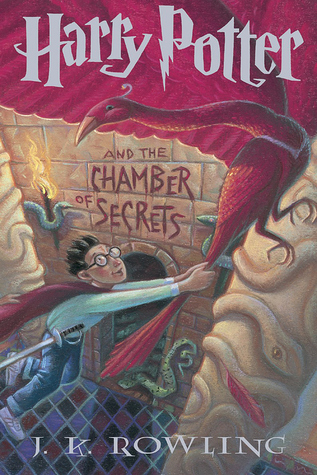

In [77]:
image_downloader(df['coverImg'][126])

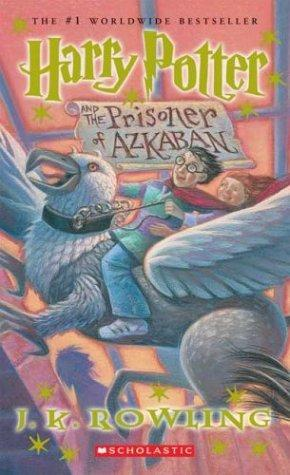

In [78]:
image_downloader(df['coverImg'][93])